<a href="https://colab.research.google.com/github/Lnchi/LetsGrowMore-Data-Science-Internship/blob/main/Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name :** Iris Flowers Classification ML Project 

  The Iris flower classification project is well-known in machine learning. It uses a dataset of flowers that have three types: Setosa,Versicolor and Virginica. Each flower has four features, which are 'Sepal length', 'Sepal width', 'Petal length', and 'Petal width'. The goal of this project is to predict which type of flower it is based on these features.

# Import the necessary libraries

In [ ]:
import pandas as pd # data manipulation and analysis in Python
import numpy as np  # numerical computing in Python
import seaborn as sns # statistical data visualization in Python
import matplotlib.pyplot as plt # creating static, interactive, and animated visualizations in Python
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
Load the iris.data file into a Pandas dataframe named df_iris



In [ ]:
# load the file
uploaded = files.upload() 
# Load the iris data from the uploaded file and Define the column names for the dataset
df_iris=pd.read_csv(io.BytesIO(uploaded['iris.data']), header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Saving iris.data to iris (1).data


The meanings of each column name:

**sepal-length:** the length of the sepal (a part of the flower) in centimeters.

**sepal-width:** the width of the sepal in centimeters.

**petal-length:** the length of the petal (another part of the flower) in centimeters.

**petal-width:** the width of the petal in centimeters.

class: the class of the Iris flower, which can be one of three possible values: Setosa, Versicolor, or Virginica.

Some summary statistics

In [ ]:
df_iris.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,class
95,5.7,3.0,4.2,1.2,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [ ]:
# Shape of the dataset
print(df_iris.shape)

(150, 5)


In [ ]:
# Summary statistics of the dataset
print(df_iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Check the data for any missing values 


In [ ]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
df_iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
df_iris.drop_duplicates(inplace=True)

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


 Distribution of each class

In [ ]:
# class distribution
distribution=df_iris.groupby('class').size()
print(distribution) 

class
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64


# Exploratory data and visualisation

- Let's analyze the iris flower dataset class distribution 

Text(0.5, 1.0, 'Iris flower dataset class distribution')

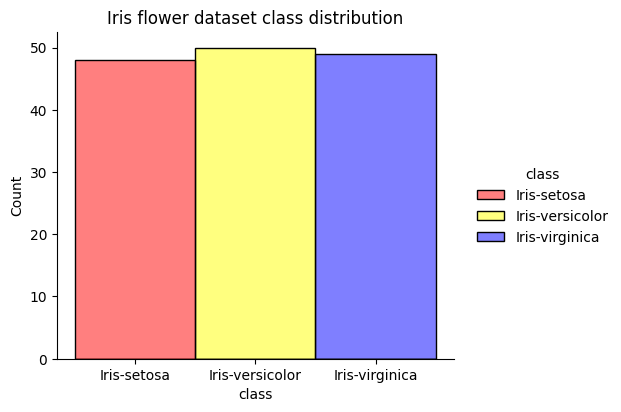

In [ ]:
sns.displot(data=df_iris, x='class', height=4, aspect=1.2, hue='class', palette={'Iris-setosa': 'red', 'Iris-versicolor': 'yellow', 'Iris-virginica': 'blue'})
plt.title('Iris flower dataset class distribution')

- Let's create a scatter plot matrix of the Iris dataset, with different colors for each flower class. This can help us visualize the relationships between different features in the dataset

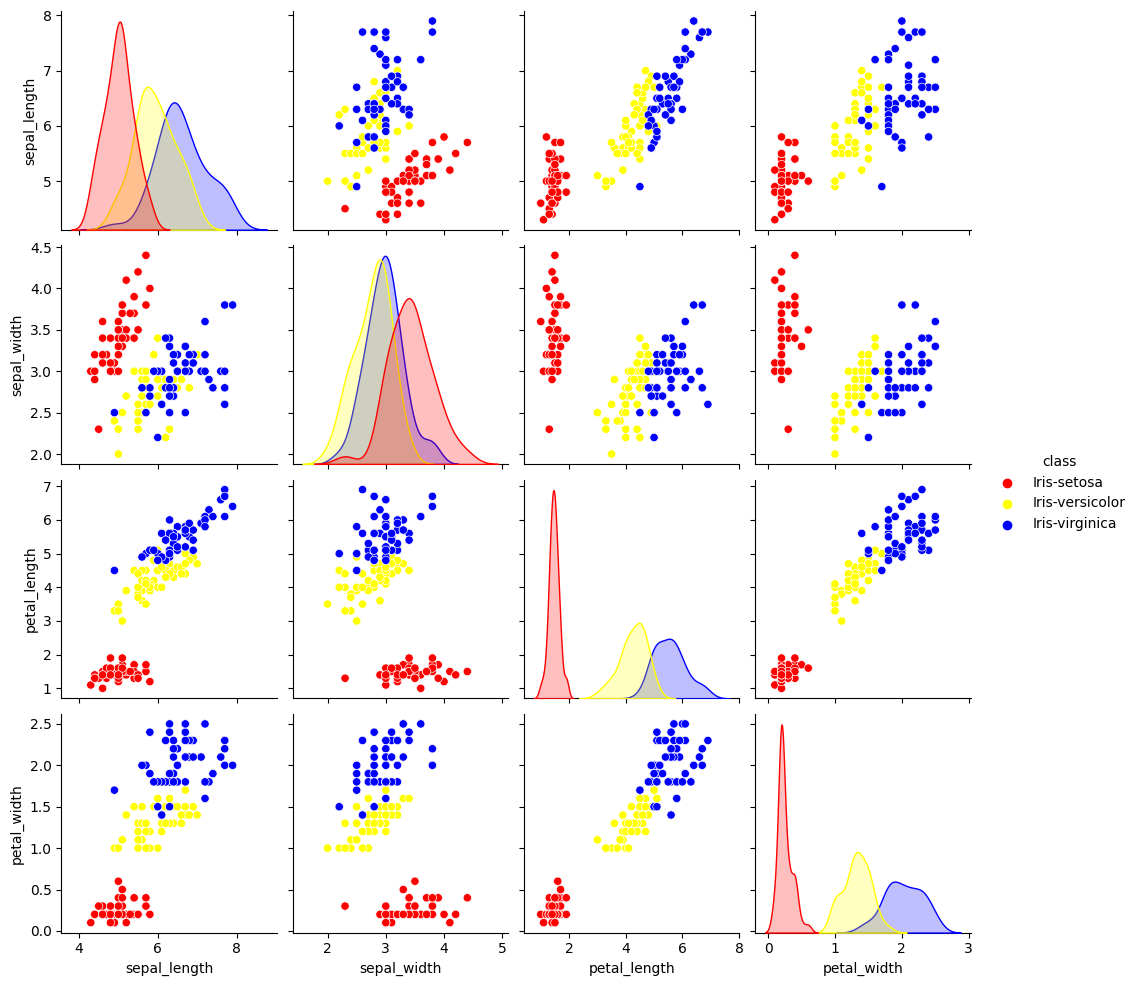

In [ ]:
# Define a custom color palette
my_palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'yellow', 'Iris-virginica': 'blue'}
sns.pairplot(df_iris, hue='class', palette=my_palette);

- The correlation

<ipython-input-55-3e5dbc0df205>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_iris.corr()


<Axes: >

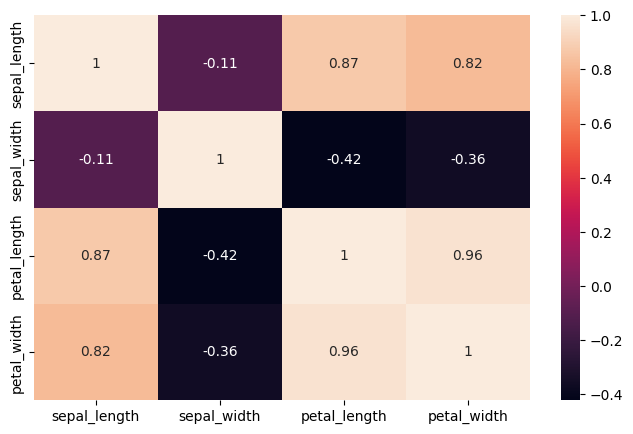

In [ ]:
corr=df_iris.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)


- There is a strong positive correlation between petal_width and petal_length.

# Preprocess the data

- Before training a model, it is important to divide the data into two sets: one for training the model and another for testing its performance.
- We'll use 80% of the data for training and 20% for testing.

In [ ]:
# Split the dataset into input features and output classes
x=df_iris.iloc[:, :-1]
y=df_iris.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# Train the models
- Now we can create multiple machine learning models to classify the Iris flowers. We'll use the following baseline models : KNN Neighbors Classifier, Random Forest Classifier, Support Vector Classifier and Logistic Regression.

- KNN Neighbors

In [ ]:
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

- SVM Classifier : Create the SVM classifier with a linear kernel

In [ ]:
model_svm=svm.SVC(kernel='linear', random_state=0)
model_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

- Random Forest Classifier

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

- Logistic Regression

In [ ]:
model_lr= LogisticRegression()
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate the models
- Finally, we can evaluate the performance of the models on the test set.

- KNN Neighbors

Accuracy: 0.9666666666666667
Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(50.72222222222221, 0.5, 'Actual')

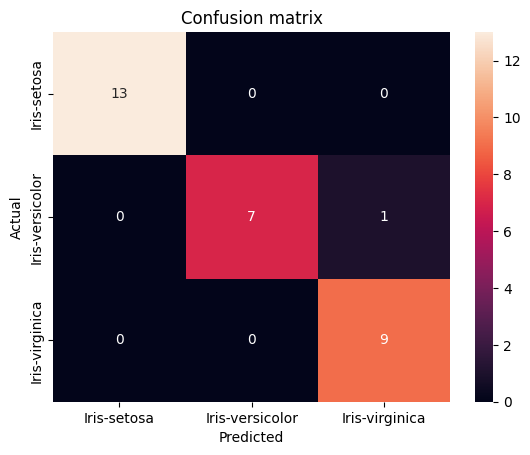

In [ ]:
y_predict_knn=model_knn.predict(x_test)
Accuracy_knn=accuracy_score(y_test,y_predict_knn)
print(f'Accuracy: {Accuracy_knn}')
#A report with precision, recall, F1-score, and support for each class.
report_knn=classification_report(y_test,y_predict_knn)
print(f'Report: {report_knn}')

cm_knn=confusion_matrix(y_test,y_predict_knn)
class_iris=df_iris['class'].unique()
sns.heatmap(cm_knn, annot=True, fmt='g', xticklabels=class_iris, yticklabels=class_iris)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- SVM Classifier

Accuracy : 1.0 
Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(50.72222222222221, 0.5, 'Actual')

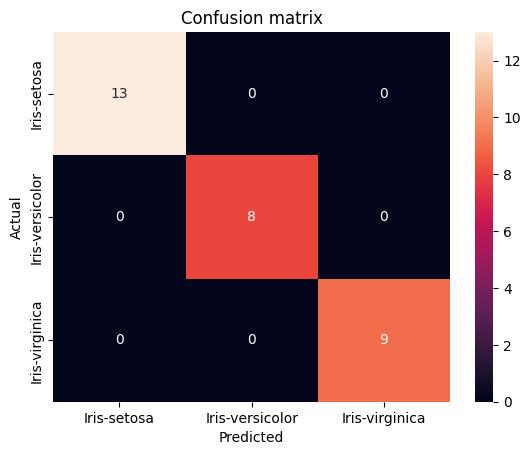

In [ ]:
y_predict_svm=model_svm.predict(x_test)
Accuracy_svm=accuracy_score(y_test, y_predict_svm)
print(f'Accuracy : {Accuracy_svm} ')

report_svm=classification_report(y_test, y_predict_svm)
print(f'Report : {report_svm}')

cm_svm=confusion_matrix(y_test,y_predict_svm)
sns.heatmap(cm_svm, annot=True, fmt='g', xticklabels=class_iris, yticklabels=class_iris)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- Random Forest Classifier

Accuracy : 0.9666666666666667 
Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(50.72222222222221, 0.5, 'Actual')

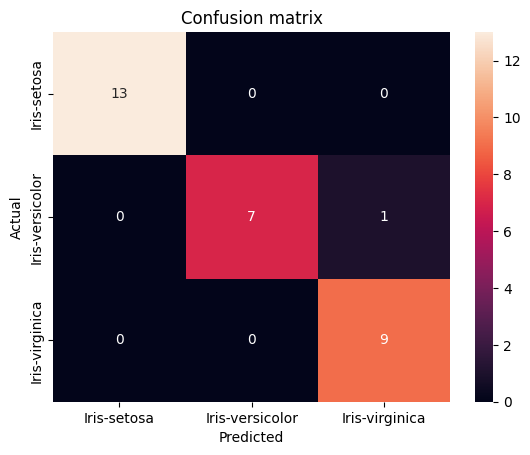

In [ ]:
y_predict_rf=model_rf.predict(x_test)
Accuracy_rf=accuracy_score(y_test, y_predict_rf)
print(f'Accuracy : {Accuracy_rf} ')

report=classification_report(y_test, y_predict_rf)
print(f'Report : {report}')

cm_rf=confusion_matrix(y_test,y_predict_rf)
sns.heatmap(cm_rf, annot=True, fmt='g', xticklabels=class_iris, yticklabels=class_iris)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- Logistic Regression

Accuracy : 0.9666666666666667 
Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(50.72222222222221, 0.5, 'Actual')

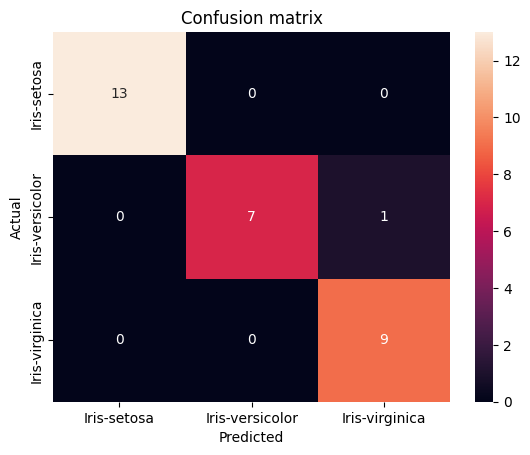

In [ ]:
y_predict_lr=model_lr.predict(x_test)
Accuracy_lr=accuracy_score(y_test, y_predict_lr)
print(f'Accuracy : {Accuracy_lr} ')

report=classification_report(y_test, y_predict_lr)
print(f'Report : {report}')

cm_lr=confusion_matrix(y_test,y_predict_lr)
sns.heatmap(cm_lr, annot=True, fmt='g', xticklabels=class_iris, yticklabels=class_iris)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
comparison=pd.DataFrame({
    'Model':['KNN', 'SVM', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [Accuracy_knn, Accuracy_svm, Accuracy_rf, Accuracy_lr]
})
print(comparison)

                 Model  Accuracy
0                  KNN  0.966667
1                  SVM  1.000000
2        Random Forest  0.966667
3  Logistic Regression  0.966667
